# Part 1: PCA and Variance Threshold in a Linear Regression

Import the housing data as a data frame and ensure that the data is loaded properly.

In [253]:
import pandas as pd

In [254]:
housing_df = pd.read_csv("/Users/theranmeadows/Desktop/dsc550datamining/week7/train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Drop the "Id" column and any features that are missing more than 40% of their values.

In [255]:
housing_df = housing_df.drop(['Id'], axis = 1)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [256]:
# shape to ge the number of rows
housing_df.shape

(1460, 80)

In [257]:
# 60% of the data set
1460 * 0.60

876.0

In [258]:
housing_df = housing_df.dropna(axis = 1, thresh = 876)

In [259]:
housing_df.shape

(1460, 74)

For numerical columns, fill in any missing data with the median value.

In [260]:
num_cols = housing_df.select_dtypes(include=['number']).columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [261]:
for col in num_cols:
    housing_df[col] = housing_df[col].fillna(housing_df[col].median())

For categorical columns, fill in any missing data with the most common value (mode).

In [262]:
cat_cols = list(set(housing_df.columns)-set(num_cols))
cat_cols

['LotShape',
 'MSZoning',
 'LandContour',
 'SaleCondition',
 'RoofMatl',
 'BsmtQual',
 'PavedDrive',
 'HouseStyle',
 'ExterQual',
 'Street',
 'RoofStyle',
 'LandSlope',
 'Utilities',
 'BldgType',
 'GarageQual',
 'GarageType',
 'Functional',
 'Heating',
 'Electrical',
 'LotConfig',
 'ExterCond',
 'GarageCond',
 'CentralAir',
 'KitchenQual',
 'Condition2',
 'BsmtFinType1',
 'GarageFinish',
 'Neighborhood',
 'SaleType',
 'Condition1',
 'BsmtCond',
 'Exterior2nd',
 'Exterior1st',
 'HeatingQC',
 'BsmtFinType2',
 'Foundation',
 'BsmtExposure']

In [263]:
for col in cat_cols:
    housing_df[col] = housing_df[col].fillna(housing_df[col].mode())

Convert the categorical columns to dummy variables.

In [264]:
dummy_df = pd.get_dummies(housing_df, columns = cat_cols)
dummy_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,True,False,False,False,False,False,False,True
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,True,False,False,False,False,False,True,False,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,True,False,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,True,False,False,False,False,False,False,False,False,True
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,True,False,False,False,True,False,False,False


Split the data into a training and test set, where the SalePrice column is the target.

In [265]:
from sklearn.model_selection import train_test_split 

In [266]:
X = dummy_df.drop('SalePrice', axis = 1)
y = dummy_df['SalePrice']

In [267]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,True,False,False,False,False,False,False,True
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,True,False,False,False,False,False,True,False,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,True,False,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,True,False,False,False,False,False,False,False,False,True
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,True,False,False,False,True,False,False,False


In [268]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Run a linear regression and report the R2-value and RMSE on the test set.

In [270]:
from sklearn.linear_model import LinearRegression

In [271]:
dummy_model = LinearRegression()

In [272]:
dummy_model.fit(X_train, y_train)

LinearRegression()

In [273]:
from sklearn import metrics

In [274]:
predictions = dummy_model.predict(X_test)

In [275]:
print("R2: " + str(metrics.r2_score(y_test, predictions)))
print("RMSE: " + str(metrics.mean_squared_error(y_test, predictions, squared = False)))

R2: 0.8708251311279916
RMSE: 27866.194229081113


Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [276]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [277]:
scaler = StandardScaler()

In [278]:
scaled_X_train = scaler.fit_transform(X_train)

pca = PCA(n_components = 0.9, whiten = True)

pca_X_train = pca.fit_transform(scaled_X_train)

How many features are in the PCA-transformed matrix?

In [279]:
# 1168 rows and 136 features
pca_X_train.shape

(1168, 135)

Transform but DO NOT fit the test features with the same PCA.

In [280]:
scaled_X_test = scaler.transform(X_test)

In [281]:
pca_X_test = pca.transform(scaled_X_test)

Repeat step 7 with your PCA transformed data.

In [282]:
pca_model = LinearRegression()

In [283]:
pca_model.fit(pca_X_train, y_train)

LinearRegression()

In [284]:
pca_predictions = pca_model.predict(pca_X_test)

In [285]:
print("R2: " + str(metrics.r2_score(y_test, pca_predictions)))
print("RMSE: " + str(metrics.mean_squared_error(y_test, pca_predictions, squared = False)))

R2: 0.9043825119063662
RMSE: 23974.92793291978


Take your original training features (from step 6) and apply a min-max scaler to them.

In [286]:
from sklearn.preprocessing import MinMaxScaler

In [287]:
minmax = MinMaxScaler()

In [288]:
minmax_X_train = minmax.fit_transform(X_train)

Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [289]:
from sklearn.feature_selection import VarianceThreshold

In [290]:
varthreshold = VarianceThreshold()

In [291]:
var_X_train = varthreshold.fit_transform(minmax_X_train)

Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [292]:
minmax_X_test = minmax.transform(X_test)

var_X_test = varthreshold.transform(minmax_X_test)

Repeat step 7 with the high variance data.

In [293]:
var_model = LinearRegression()

In [294]:
var_model.fit(var_X_train, y_train)

LinearRegression()

In [295]:
var_predictions = var_model.predict(var_X_test)

In [296]:
print("R2: " + str(metrics.r2_score(y_test, var_predictions)))
print("RMSE: " + str(metrics.mean_squared_error(y_test, var_predictions, squared = False)))

R2: -1.4281987256072805e+20
RMSE: 926580093756010.0


Summarize your findings.

With reduced features in the PCA model, the model was still able to perform. 
The high variance model did not do so well with features being reduced

# Part 2: Categorical Feature Selection

Import the data as a data frame and ensure it is loaded correctly.

In [297]:
import pandas as pd

In [306]:
mushrooms_df = pd.read_csv("/Users/theranmeadows/Desktop/dsc550datamining/week7/mushrooms.csv")
mushrooms_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [307]:
mushrooms_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [308]:
# Class values are 'e' for 'edible' and 'p' for 'poisonous' 
# we can drop the 'class' column as that will be our target variable

mushroom_class = mushrooms_df['class']
mushrooms_df = mushrooms_df.drop('class', axis = 1)

Convert the categorical features (all of them) to dummy variables.

In [309]:
mushrooms_df = pd.get_dummies(mushrooms_df)
mushrooms_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [310]:
mushrooms_df = mushrooms_df.replace(False, 0)
mushrooms_df = mushrooms_df.replace(True, 1)
mushrooms_df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Split the data into a training and test set.

In [311]:
mush_X = mushrooms_df
mush_y = mushroom_class

In [312]:
mX_train, mX_test, my_train, my_test = train_test_split(mush_X, mush_y, test_size = 0.2)

Fit a decision tree classifier on the training set.

In [313]:
from sklearn.tree import DecisionTreeClassifier

In [314]:
decision_tree = DecisionTreeClassifier()

In [315]:
mush_model = decision_tree.fit(mX_train, my_train)

Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [316]:
mush_predictions = mush_model.predict(mX_test)

In [317]:
from sklearn.metrics import accuracy_score

In [318]:
accuracy_score(my_test, mush_predictions)

1.0

In [319]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [320]:
mush_matrix = confusion_matrix(my_test, mush_predictions)

In [322]:
mush_matrix_df = pd.DataFrame(mush_matrix)
mush_matrix

array([[833,   0],
       [  0, 792]])

Create a visualization of the decision tree.

[Text(0.5882352941176471, 0.9375, 'x[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3375, 3124]'),
 Text(0.35294117647058826, 0.8125, 'x[53] <= 0.5\ngini = 0.287\nsamples = 3661\nvalue = [636, 3025]'),
 Text(0.23529411764705882, 0.6875, 'x[55] <= 0.5\ngini = 0.129\nsamples = 3219\nvalue = [223, 2996]'),
 Text(0.17647058823529413, 0.5625, 'x[25] <= 0.5\ngini = 0.048\nsamples = 3071\nvalue = [75, 2996]'),
 Text(0.11764705882352941, 0.4375, 'x[22] <= 0.5\ngini = 0.023\nsamples = 3031\nvalue = [35, 2996]'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 2996\nvalue = [0, 2996]'),
 Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.29411764705882354, 0.5625, 'gini = 0.0\nsamples = 148\nvalue = [148, 0]'),
 Text(0.47058823529411764, 0.6875, 'x[102] <= 0.5\ngini = 0.123\nsamples = 442\nvalue = [413, 29]'),
 Text(0.4117647058823529, 0.5625, 'gini = 0.0\nsamples 

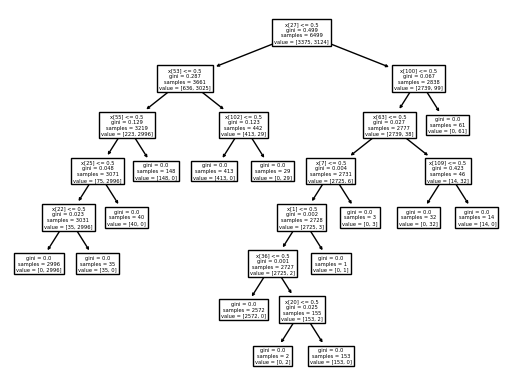

In [324]:
from sklearn import tree

tree.plot_tree(mush_model)

Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [325]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import array 

In [327]:
chi2_selector = SelectKBest(chi2, k = 5)
top_5_features = chi2_selector.fit_transform(mX_train, my_train)

Which five features were selected in step 7? Hint: Use the get_support function.

In [328]:
features = array(mX_train.columns)

In [329]:
selected_feat = chi2_selector.get_support()

In [331]:
print(features[selected_feat])

['odor_f' 'odor_n' 'gill-color_b' 'stalk-surface-above-ring_k'
 'stalk-surface-below-ring_k']


Repeat steps 4 and 5 with the five best features selected in step 7.

In [337]:
decision_tree_top_5 = DecisionTreeClassifier()

In [338]:
top_5_model = decision_tree_top_5.fit(top_5_features, my_train)

In [339]:
top_5_test = chi2_selector.transform(mX_test)

In [340]:
top_5_predictions = top_5_model.predict(top_5_test)

In [342]:
accuracy_score(my_test, top_5_predictions)

0.9341538461538461

In [343]:
top_5_matrix = confusion_matrix(my_test, top_5_predictions)

In [345]:
top_5_features_df = pd.DataFrame(top_5_matrix)
top_5_features_df

,0,1
0,833,0
1,107,685


Summarize your findings.

The top 5 features alone are still significant enough to determine if a mushroom is safe to eat or not. 